In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Úloha 2 - jak daleko je přistávací plošina? (pokračování úlohy 1)

V této úloze se pokusíme odhadnout jak daleko byla přistávací plošina pro první stupeň rakety Falcon 9 pomocí dat o aktuální výčce (Altitude) a uražené vzdálenosti (Distance). Data k této úloze jsou částečně převzata z tohoto [vlákna](https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_telemetry_data/) na sociální síti Reddit od uživatele tossha a částečně z řešení předešlé úlohy, ve které jsme pomocí dat o rychlosti dopočítali uraženou vzdálenost rakety.

In [9]:
#Import dat z předchozí úlohy

telemetry_data = pd.read_csv("data_uloha_2.csv")

#zdroj dat:
# https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_telemetry_data/
# https://docs.google.com/spreadsheets/d/1ihRLDqwy95p-Y0bJ9YGfjQTt5ZRgwCu7xzmJ3fdRguo/edit?gid=0#gid=0
# Předešla úloha

Popis načtených dat:
- Frame - pořadové číslo snímku vysílání ze kterého byla data získána,
- Speed $v$ [$\frac{\text{m}}{\text{s}}$] - aktuální rychlost rakety,
- Altitude $y$ [km] - aktuální výška rakety,
- Time $t$ [s] - čas 
- Distance $d$ [m] - celková utržená vzdálenost rakety (vypočteno z předešlé úlohy)
- Acceleration $a$ [$\frac{\text{m}}{\text{s}^2}$] - aktuální zrychlení rakety (vypočteno z předešlé úlohy)

In [14]:
# Převod výškových kilometrů na metry

telemetry_data["Altitude"] = 1000*telemetry_data["Altitude"]

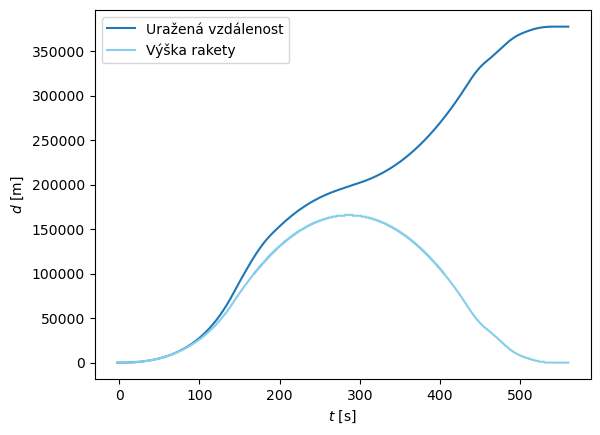

In [18]:
#Graf uražené vzdálenosti v závislosti na čase

plt.plot(telemetry_data["Time"], telemetry_data["Distance"], label = "Uražená vzdálenost")
plt.plot(telemetry_data["Time"], telemetry_data["Altitude"], label = "Výška rakety", color = "skyblue")

plt.xlabel("$t$ [s]")
plt.ylabel("$d$ [m]")

plt.legend()

Náš odhad vzálenosti přistávací plošiny prvního stupně rakety bude založen na aplikaci Pythagorova trojúhelníku. Jak pythagorův trojúhelník využijeme? V každém časovém intervalu $\Delta t_i$ známe uraženou vzdálenost $\Delta d_i$ a změnu výšky rakety $\Delta y_i$. Budeme předpokládat že se raketa pohybuje v rovině. V každém časovém úseku můžeme pomocí Pythagorovy věty dopočítat uraženou horizontální vzálenost $\Delta x_i$ kterou raketa za daný úsek urazila

\begin{gather*}
    (\Delta d_i) ^2 = (\Delta x_i)^2 + (\Delta y_i)^2, \\
    \Delta x_i = \sqrt{(\Delta d_i)^2 - (\Delta y_i)^2}.
\end{gather*}

Pokud vypočteme uraženou horizontální vzdálenost $\Delta x_i$ pro každý časový interval $\Delta t_i$, tak můžeme odhadnout vzdálenost přistávací plošiny součtem všech uražených horizontálních vzdáleností

\begin{equation*}
    x = \sum_i x_i = \sum_i \sqrt{(\Delta d_i)^2 - (\Delta y_i)^2}.
\end{equation*}

In [42]:
telemetry_data["Horizontal distance"] = 0

for i in range(1, len(telemetry_data)):
    x_i_squared = (telemetry_data.loc[i, "Distance"]-telemetry_data.loc[i-1, "Distance"])**2-(telemetry_data.loc[i, "Altitude"]-telemetry_data.loc[i-1, "Altitude"])**2
    telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)

    # if x_i_squared > 0:
    #     telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)
    # else:
    #     telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]-np.sqrt(-x_i_squared)

/tmp/ipykernel_612/2816182983.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0299999999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)
/tmp/ipykernel_612/2816182983.py:5: RuntimeWarning: invalid value encountered in sqrt
  telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)
/tmp/ipykernel_612/2816182983.py:5: RuntimeWarning: invalid value encountered in sqrt
  telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)
/tmp/ipykernel_612/2816182983.py:5: RuntimeWarning: invalid value encountered in sqrt
  telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)
/t

In [43]:
telemetry_data

,Frame,Speed,Altitude,Time,Distance,Acceleration,Horizontal distance
0,1,0,0.0,-2.37,0.00,0.220264,0.0
1,2,0,0.0,-2.34,0.00,0.220264,0.0
2,3,0,0.0,-2.30,0.00,0.220264,0.0
3,4,0,0.0,-2.27,0.00,0.220264,0.0
4,5,0,0.0,-2.24,0.00,0.220264,0.0
...,...,...,...,...,...,...,...
16850,16851,0,0.0,559.80,377464.62,0.000000,NaN
16851,16852,0,0.0,559.83,377464.62,0.000000,NaN
16852,16853,0,0.0,559.87,377464.62,0.000000,NaN
16853,16854,0,0.0,559.90,377464.62,0.000000,NaN


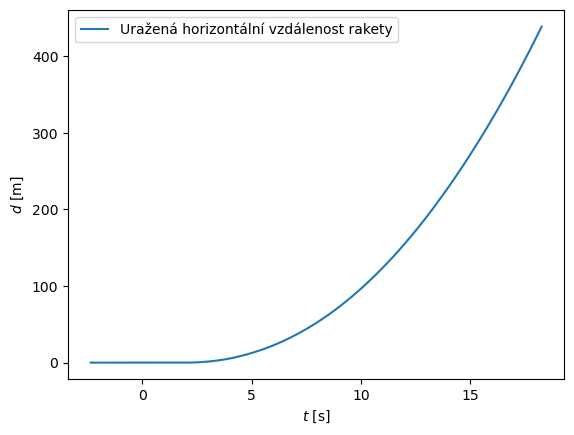

In [44]:
#Graf uražené vzdálenosti v závislosti na čase

plt.plot(telemetry_data["Time"], telemetry_data["Horizontal distance"], label = "Uražená horizontální vzdálenost rakety")

plt.xlabel("$t$ [s]")
plt.ylabel("$d$ [m]")

plt.legend()

Vidíme, že raketa by podle našich výpočtů měla urazit 

In [45]:
telemetry_data.to_csv("data.csv")

In [102]:
telemetry_data["Horizontal distance"] = 0
help_distance = 0
help_index = []
index = 1
a = []

for i in range(1, len(telemetry_data)):
    if telemetry_data.loc[i, "Altitude"] > telemetry_data.loc[index-1, "Altitude"] + 1000:
        x_i_squared = (telemetry_data.loc[i, "Distance"]-telemetry_data.loc[index, "Distance"])**2-(telemetry_data.loc[i, "Altitude"]-telemetry_data.loc[index, "Altitude"])**2
        index = i
        if x_i_squared > 0:
            a.append(np.sqrt(x_i_squared))
            help_index.append(index)
    else:
        index = i



    # x_i_squared = (telemetry_data.loc[i, "Distance"]-telemetry_data.loc[i-1, "Distance"])**2-(telemetry_data.loc[i, "Altitude"]-telemetry_data.loc[i-1, "Altitude"])**2
    # telemetry_data.loc[i, "Horizontal distance"] = telemetry_data.loc[i-1, "Horizontal distance"]+np.sqrt(x_i_squared)


In [99]:
help_index

[]

In [100]:
a

[]

In [101]:
sum(a)

0

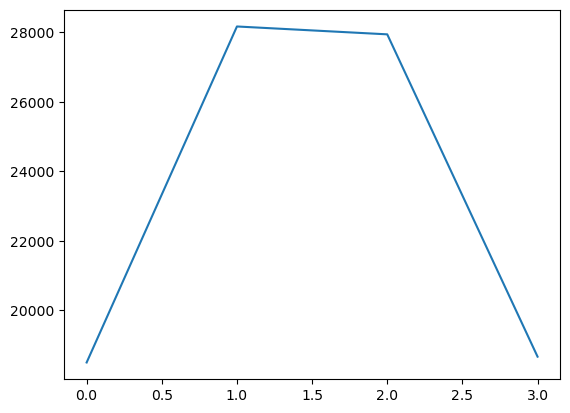

In [92]:
plt.plot(a)

In [ ]:
asi nejde...